In [16]:
import libsql_experimental as libsql
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
load_dotenv()
url = os.getenv("TURSO_DATABASE_URL")
auth_token = os.getenv("TURSO_AUTH_TOKEN")
conn = libsql.connect("proyectomacro.db", sync_url=url, auth_token=auth_token)
cursor = conn.cursor()
conn.sync()

2025-03-13T01:18:32.065454Z  INFO libsql::replication::remote_client: Attempting to perform handshake with primary.
2025-03-13T01:18:32.434007Z  WARN libsql::replication::remote_client: Frames prefetching failed because of new session token returned by handshake


In [18]:
df=pd.read_sql_query('select * from balanza_comercial',conn)
# La lista de exportaciones de 1992 a 2024:
Exportaciones = [
    741.1, 785.8, 1089.8, 1137.6, 1214.5, 1253.9, 1108.1, 1042.2, 
    1246.3, 1226.2, 1319.9, 1589.8, 2194.6, 2867.4, 4088.3, 4821.8, 
    6932.9, 5399.6, 6966.1, 9145.8, 11814.6, 12251.7, 12899.1, 8737.1, 
    7126.3, 8223.1, 9014.7, 8804.9, 6974.7, 11165.2, 13856.3, 10806.0, 8923.0
]

# Crear un dataframe con los datos de la lista, asignándoles el rango de años de 1992 a 2024:
years_new = list(range(1992, 2025))
df_new = pd.DataFrame({
    'Año': years_new,
    'Exportaciones': Exportaciones
})

# Concatenar el dataframe original con el nuevo:
df_concat = pd.concat([df, df_new], ignore_index=True)

# Ordenar por 'Año'
df_concat = df_concat.sort_values('Año')

# Para los años en conflicto (1992-2004), usamos los datos del df_new.
# Esto se puede hacer agrupando por 'Año' y tomando la última entrada de cada grupo.
df_final = df_concat.groupby('Año', as_index=False).last()

# df_final tendrá la columna 'Exportaciones' con datos desde 1949 hasta 2024.
df_final.tail(30)

/tmp/ipykernel_36981/3368974869.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query('select * from balanza_comercial',conn)


,Año,Exportaciones,Importaciones,Saldo_Comercial
46,1995,2058.5,1433.588916,624.911084
47,1996,1214.5,1656.614754,-361.314754
48,1997,1253.9,1925.733668,-653.633668
49,1998,1108.1,2450.892111,-175.692111
50,1999,1405.4,2098.113002,-692.713002
51,2000,2593.1,2020.311118,572.788882
52,2001,1226.2,1708.269655,-355.369655
53,2002,1319.9,1831.969465,-457.069465
54,2003,1676.6,1692.066070,-15.466070
55,2004,2194.6,1920.428040,344.771960


In [19]:
# Calcular los retornos logarítmicos interanuales
log_returns = np.diff(np.log(df_final['Exportaciones']))

# Calcular la volatilidad como la desviación estándar muestral de los retornos
volatilidad = np.std(log_returns, ddof=1)

print("Volatilidad anual (desviación estándar de los retornos logarítmicos):", volatilidad)

Volatilidad anual (desviación estándar de los retornos logarítmicos): 0.25604942385105683


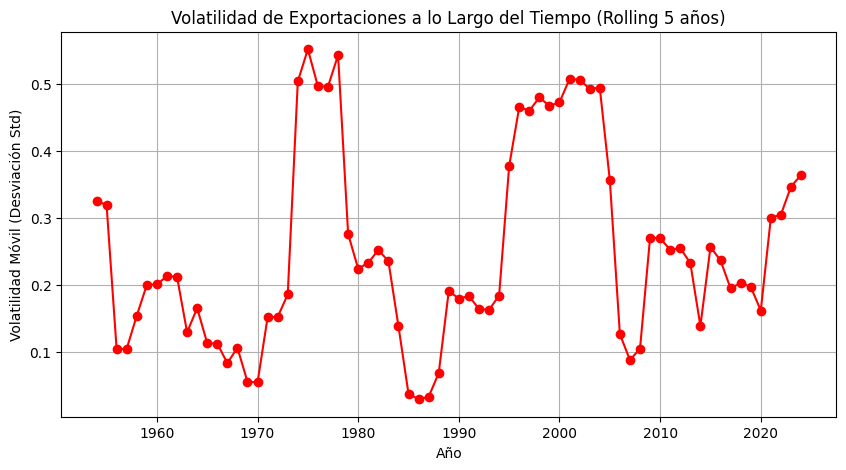

In [20]:
# Calcular volatilidad móvil en ventanas de 5 años
df_final["Volatilidad_Movil"] = df_final["Exportaciones"].pct_change().rolling(window=5).std()
plt.figure(figsize=(10, 5))
plt.plot(df_final["Año"], df_final["Volatilidad_Movil"], marker='o', linestyle='-', color='r')

plt.xlabel("Año")
plt.ylabel("Volatilidad Móvil (Desviación Std)")
plt.title("Volatilidad de Exportaciones a lo Largo del Tiempo (Rolling 5 años)")
plt.grid(True)
plt.show()

